In [1]:
pip install vaderSentiment

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [2]:
merged_data = pd.read_csv('Merged_Dataset.csv')

In [3]:
merged_data.iloc[800:810]

,Drug,Disease,Review,Rating,UsefulCount,Symptoms
800,Clarithromycin,pneumonia,"""Strong metallic taste for the first couple of...",8,9,"['cough', 'fever', 'decreased translucency', ..."
801,Doxycycline,pneumonia,"""On Day 3 of a 7 day course at 1 tablet per da...",4,5,"['cough', 'fever', 'decreased translucency', ..."
802,Levofloxacin,pneumonia,"""I came back from Roatan with acute pneumonia ...",9,14,"['cough', 'fever', 'decreased translucency', ..."
803,Levofloxacin,pneumonia,"""Caught a cold which gradually started affecti...",8,10,"['cough', 'fever', 'decreased translucency', ..."
804,Cefdinir,pneumonia,"""10 days for pneumonia doctor prepared me for ...",9,10,"['cough', 'fever', 'decreased translucency', ..."
805,Avelox,pneumonia,"""I am on Day 2 with Avelox for pneumonia. Wor...",7,8,"['cough', 'fever', 'decreased translucency', ..."
806,Avelox,pneumonia,"""Wow! I should not be susprised after all I di...",9,29,"['cough', 'fever', 'decreased translucency', ..."
807,Azithromycin,pneumonia,"""So, I had walking pneumonia for a little whil...",8,9,"['cough', 'fever', 'decreased translucency', ..."
808,Avelox,pneumonia,"""Am on day six of 10 course for pneumonia. Had...",7,28,"['cough', 'fever', 'decreased translucency', ..."
809,Levaquin,pneumonia,"""I had pneumonia &amp; had been sick for 2 wee...",1,2,"['cough', 'fever', 'decreased translucency', ..."


In [4]:
merged_data.shape

(8906, 6)

In [5]:
review_list = list(merged_data.Review)

**Sentiment analysis of drug reviews using the VADER tool.**

In [6]:
sentiments = []
positive = []
negative = []
neutral = []
compound = []


for text in review_list:

  # Running Vader Analysis on each review
  com = analyser.polarity_scores(text)["compound"]
  pos = analyser.polarity_scores(text)["pos"]
  neu = analyser.polarity_scores(text)["neu"]
  neg = analyser.polarity_scores(text)["neg"]

  # Adding each value to the corresponding array
  positive.append(pos)
  negative.append(neg)
  neutral.append(neu)
  compound.append(com)
  sentiments.append({"Review":text,
                     "Positive": pos,
                     "Negative": neu,
                     "Neutral": neg,
                     "Compound": com})

sentiments_pd = pd.DataFrame.from_dict(sentiments)

In [7]:
sentiments_pd.iloc[8102:8110]

,Review,Positive,Negative,Neutral,Compound
8102,"""I&#039;m currently on day two of the pill, an...",0.162,0.804,0.034,0.8264
8103,"""This medicine gave me diarrhea.""",0.000,1.000,0.000,0.0000
8104,"""Helped loosen this putty gunk in my lungs mak...",0.175,0.825,0.000,0.5256
8105,"""I started taking Ceftin for Bronchitis and I ...",0.157,0.843,0.000,0.7717
8106,"""Disclosure: This is just one person&#039;s ex...",0.088,0.883,0.028,0.7269
8107,"""Extreme stomach discomfort and nausea as well...",0.118,0.562,0.319,-0.5542
8108,"""On March 23, 2017 went to urgent care and was...",0.109,0.846,0.045,0.8591
8109,"""Dosage was 500 mg for 10 days. Stopped after ...",0.061,0.730,0.210,-0.7871


In [8]:
merged_data

,Drug,Disease,Review,Rating,UsefulCount,Symptoms
0,Olanzapine,schizophrenia,"""This drug saved my life, I had been on almost...",10,6,"['hallucinations auditory', 'hypersomnolence',..."
1,Ziprasidone,schizophrenia,"""Geodon is a very effective drug for me. Comp...",10,33,"['hallucinations auditory', 'hypersomnolence',..."
2,Loxapine,schizophrenia,"""This medicine completely changed my life in t...",10,22,"['hallucinations auditory', 'hypersomnolence',..."
3,Ziprasidone,schizophrenia,"""I&#039;ve been on geodon for about three week...",7,6,"['hallucinations auditory', 'hypersomnolence',..."
4,Abilify,schizophrenia,"""I switched from Risperidal to Abilify two yea...",10,53,"['hallucinations auditory', 'hypersomnolence',..."
...,...,...,...,...,...,...
8901,Integra F,anemia,"""I was very pleased with Integra F to treat my...",9,29,"['chill', 'guaiac positive', 'monoclonal', 'ec..."
8902,Procrit,anemia,"""I have pots syndrome And low blood plasma..\r...",1,0,"['chill', 'guaiac positive', 'monoclonal', 'ec..."
8903,Multivitamin with iron,anemia,"""Was taking twice a day while I was pregnant. ...",8,5,"['chill', 'guaiac positive', 'monoclonal', 'ec..."
8904,Multivitamin with iron,anemia,"""I had a haematocrit of 18 and I started takin...",10,22,"['chill', 'guaiac positive', 'monoclonal', 'ec..."


In [9]:
#Adding the sentiment analysis columns to the merged dataset.
merged_data["Positive"] = positive
merged_data["Negative"] = negative
merged_data["Neutral"] = neutral
merged_data["Compound"] = compound
merged_data["Review_Sentiment"] = ''

In [10]:
merged_data.iloc[800:810]

,Drug,Disease,Review,Rating,UsefulCount,Symptoms,Positive,Negative,Neutral,Compound,Review_Sentiment
800,Clarithromycin,pneumonia,"""Strong metallic taste for the first couple of...",8,9,"['cough', 'fever', 'decreased translucency', ...",0.046,0.051,0.903,-0.0516,
801,Doxycycline,pneumonia,"""On Day 3 of a 7 day course at 1 tablet per da...",4,5,"['cough', 'fever', 'decreased translucency', ...",0.169,0.189,0.641,-0.4805,
802,Levofloxacin,pneumonia,"""I came back from Roatan with acute pneumonia ...",9,14,"['cough', 'fever', 'decreased translucency', ...",0.059,0.092,0.849,-0.5379,
803,Levofloxacin,pneumonia,"""Caught a cold which gradually started affecti...",8,10,"['cough', 'fever', 'decreased translucency', ...",0.157,0.034,0.809,0.9528,
804,Cefdinir,pneumonia,"""10 days for pneumonia doctor prepared me for ...",9,10,"['cough', 'fever', 'decreased translucency', ...",0.084,0.052,0.864,0.4199,
805,Avelox,pneumonia,"""I am on Day 2 with Avelox for pneumonia. Wor...",7,8,"['cough', 'fever', 'decreased translucency', ...",0.000,0.179,0.821,-0.8488,
806,Avelox,pneumonia,"""Wow! I should not be susprised after all I di...",9,29,"['cough', 'fever', 'decreased translucency', ...",0.188,0.137,0.675,0.3802,
807,Azithromycin,pneumonia,"""So, I had walking pneumonia for a little whil...",8,9,"['cough', 'fever', 'decreased translucency', ...",0.059,0.082,0.860,-0.3400,
808,Avelox,pneumonia,"""Am on day six of 10 course for pneumonia. Had...",7,28,"['cough', 'fever', 'decreased translucency', ...",0.129,0.109,0.762,0.2039,
809,Levaquin,pneumonia,"""I had pneumonia &amp; had been sick for 2 wee...",1,2,"['cough', 'fever', 'decreased translucency', ...",0.017,0.213,0.770,-0.9861,


Based on the compound value we can determine whether the overall sentiment of the review is postive, negative or neutral.
Below will be the threshold we shall be using for classifying the review sentiment class:
1. Positive: compound score >= 0.05
2. Neutral : -0.05 < compound score < 0.05
3. Negative: compound score <= -0.05

In [11]:
merged_data.loc[merged_data['Compound'] >= 0.05, 'Review_Sentiment'] ='Positive'
merged_data.loc[merged_data['Compound'] <= -0.05, 'Review_Sentiment'] ='Negative'

In [12]:
merged_data.iloc[8002:8109]

,Drug,Disease,Review,Rating,UsefulCount,Symptoms,Positive,Negative,Neutral,Compound,Review_Sentiment
8002,Doxycycline,bronchitis,"""Very powerful. Works good for the infections ...",6,40,"['cough', 'wheezing', 'shortness of breath', '...",0.094,0.197,0.709,-0.7559,Negative
8003,Levofloxacin,bronchitis,"""Took this last year for my first bout with pn...",10,66,"['cough', 'wheezing', 'shortness of breath', '...",0.235,0.000,0.765,0.9499,Positive
8004,Omnicef,bronchitis,"""It cleared me right up, stopped coughing like...",10,30,"['cough', 'wheezing', 'shortness of breath', '...",0.197,0.096,0.707,0.2500,Positive
8005,Vibramycin,bronchitis,"""Was prescribed doxycycline hcl for bronchitis...",1,47,"['cough', 'wheezing', 'shortness of breath', '...",0.025,0.138,0.837,-0.7902,Negative
8006,Zithromax,bronchitis,"""I have asthma and recently came\r\ndown with ...",8,0,"['cough', 'wheezing', 'shortness of breath', '...",0.171,0.061,0.768,0.9093,Positive
...,...,...,...,...,...,...,...,...,...,...,...
8104,Guaifenesin,bronchitis,"""Helped loosen this putty gunk in my lungs mak...",7,61,"['cough', 'wheezing', 'shortness of breath', '...",0.175,0.000,0.825,0.5256,Positive
8105,Ceftin,bronchitis,"""I started taking Ceftin for Bronchitis and I ...",10,36,"['cough', 'wheezing', 'shortness of breath', '...",0.157,0.000,0.843,0.7717,Positive
8106,Guaifenesin,bronchitis,"""Disclosure: This is just one person&#039;s ex...",5,6,"['cough', 'wheezing', 'shortness of breath', '...",0.088,0.028,0.883,0.7269,Positive
8107,Doxycycline,bronchitis,"""Extreme stomach discomfort and nausea as well...",8,46,"['cough', 'wheezing', 'shortness of breath', '...",0.118,0.319,0.562,-0.5542,Negative


In [13]:
merged_data["Review_Sentiment"].replace('', 'Neutral', inplace = True)

In [14]:
#Dropping positive, negative, neutral and compound columns.
merged_data = merged_data.drop(['Positive', 'Negative', 'Neutral', 'Compound'],axis =1)

In [15]:
merged_data.shape

(8906, 7)

In [16]:
merged_data.iloc[800:810]

,Drug,Disease,Review,Rating,UsefulCount,Symptoms,Review_Sentiment
800,Clarithromycin,pneumonia,"""Strong metallic taste for the first couple of...",8,9,"['cough', 'fever', 'decreased translucency', ...",Negative
801,Doxycycline,pneumonia,"""On Day 3 of a 7 day course at 1 tablet per da...",4,5,"['cough', 'fever', 'decreased translucency', ...",Negative
802,Levofloxacin,pneumonia,"""I came back from Roatan with acute pneumonia ...",9,14,"['cough', 'fever', 'decreased translucency', ...",Negative
803,Levofloxacin,pneumonia,"""Caught a cold which gradually started affecti...",8,10,"['cough', 'fever', 'decreased translucency', ...",Positive
804,Cefdinir,pneumonia,"""10 days for pneumonia doctor prepared me for ...",9,10,"['cough', 'fever', 'decreased translucency', ...",Positive
805,Avelox,pneumonia,"""I am on Day 2 with Avelox for pneumonia. Wor...",7,8,"['cough', 'fever', 'decreased translucency', ...",Negative
806,Avelox,pneumonia,"""Wow! I should not be susprised after all I di...",9,29,"['cough', 'fever', 'decreased translucency', ...",Positive
807,Azithromycin,pneumonia,"""So, I had walking pneumonia for a little whil...",8,9,"['cough', 'fever', 'decreased translucency', ...",Negative
808,Avelox,pneumonia,"""Am on day six of 10 course for pneumonia. Had...",7,28,"['cough', 'fever', 'decreased translucency', ...",Positive
809,Levaquin,pneumonia,"""I had pneumonia &amp; had been sick for 2 wee...",1,2,"['cough', 'fever', 'decreased translucency', ...",Negative


In [17]:
merged_data = merged_data[["Disease", "Drug", "Symptoms", "Review", "Review_Sentiment", "Rating", "UsefulCount"]]

In [18]:
merged_data.iloc[800:810]

,Disease,Drug,Symptoms,Review,Review_Sentiment,Rating,UsefulCount
800,pneumonia,Clarithromycin,"['cough', 'fever', 'decreased translucency', ...","""Strong metallic taste for the first couple of...",Negative,8,9
801,pneumonia,Doxycycline,"['cough', 'fever', 'decreased translucency', ...","""On Day 3 of a 7 day course at 1 tablet per da...",Negative,4,5
802,pneumonia,Levofloxacin,"['cough', 'fever', 'decreased translucency', ...","""I came back from Roatan with acute pneumonia ...",Negative,9,14
803,pneumonia,Levofloxacin,"['cough', 'fever', 'decreased translucency', ...","""Caught a cold which gradually started affecti...",Positive,8,10
804,pneumonia,Cefdinir,"['cough', 'fever', 'decreased translucency', ...","""10 days for pneumonia doctor prepared me for ...",Positive,9,10
805,pneumonia,Avelox,"['cough', 'fever', 'decreased translucency', ...","""I am on Day 2 with Avelox for pneumonia. Wor...",Negative,7,8
806,pneumonia,Avelox,"['cough', 'fever', 'decreased translucency', ...","""Wow! I should not be susprised after all I di...",Positive,9,29
807,pneumonia,Azithromycin,"['cough', 'fever', 'decreased translucency', ...","""So, I had walking pneumonia for a little whil...",Negative,8,9
808,pneumonia,Avelox,"['cough', 'fever', 'decreased translucency', ...","""Am on day six of 10 course for pneumonia. Had...",Positive,7,28
809,pneumonia,Levaquin,"['cough', 'fever', 'decreased translucency', ...","""I had pneumonia &amp; had been sick for 2 wee...",Negative,1,2


<AxesSubplot:xlabel='Sentiment'>

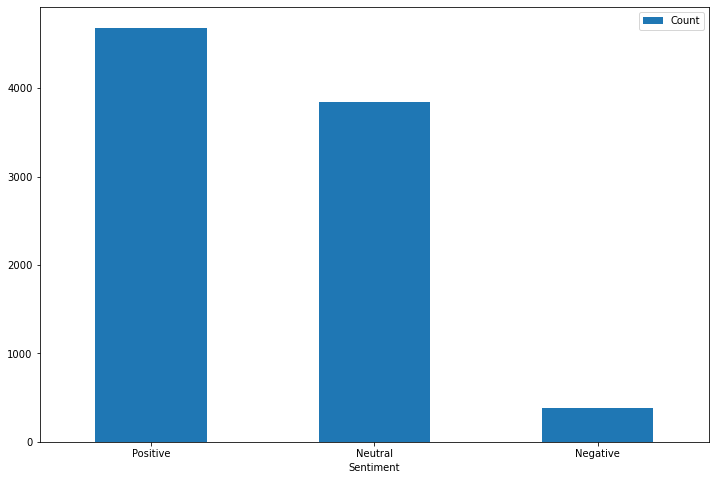

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the sentiment column unique value and their counts.
sentiment_values = merged_data['Review_Sentiment'].unique()

senti = pd.DataFrame({'Sentiment':sentiment_values, 'Count': merged_data['Review_Sentiment'].value_counts()})
senti.plot.bar(x='Sentiment', y='Count', rot=0, figsize=(12,8))

In [20]:
#Exporting data to csv.
merged_data.to_csv('Drug_Recommender.csv', index=False)

**Weighted average of rating and useful count**

In [21]:
data = pd.read_csv('Drug_Recommender.csv')

In [22]:
data.head()

,Disease,Drug,Symptoms,Review,Review_Sentiment,Rating,UsefulCount
0,schizophrenia,Olanzapine,"['hallucinations auditory', 'hypersomnolence',...","""This drug saved my life, I had been on almost...",Positive,10,6
1,schizophrenia,Ziprasidone,"['hallucinations auditory', 'hypersomnolence',...","""Geodon is a very effective drug for me. Comp...",Positive,10,33
2,schizophrenia,Loxapine,"['hallucinations auditory', 'hypersomnolence',...","""This medicine completely changed my life in t...",Neutral,10,22
3,schizophrenia,Ziprasidone,"['hallucinations auditory', 'hypersomnolence',...","""I&#039;ve been on geodon for about three week...",Negative,7,6
4,schizophrenia,Abilify,"['hallucinations auditory', 'hypersomnolence',...","""I switched from Risperidal to Abilify two yea...",Positive,10,53


In [23]:
data = data.sort_values(['Drug'])

In [24]:
def wavg(group, avg_name, weight_name):
    d = group[avg_name]
    w = group[weight_name]
    try:
        return (d * w).sum() / w.sum()
    except ZeroDivisionError:
        return d.mean()

In [25]:
wavg(data, "Rating", "UsefulCount")

7.832108243675002

In [26]:
data.groupby(["Disease", "Drug"]).apply(wavg, "Rating", "UsefulCount")

Disease        Drug           
anemia         Epoetin alfa        4.285714
               Epogen              9.000000
               Ferralet 90        10.000000
               Integra            10.000000
               Integra F           9.000000
                                    ...    
schizophrenia  Trifluoperazine     9.965909
               Vraylar             8.288793
               Ziprasidone         7.776451
               Zyprexa             7.338843
               Zyprexa Zydis       6.304348
Length: 344, dtype: float64

In [27]:
data_wavg = pd.DataFrame(data.groupby(["Drug"]).apply(wavg, "Rating", "UsefulCount").reset_index())
data_wavg = data_wavg.rename(columns={0: "Rating_Wavg"})


In [28]:
data_wavg

,Drug,Rating_Wavg
0,Abilify,7.350122
1,Abilify Maintena,8.714286
2,Acetaminophen / chlorpheniramine,8.000000
3,Acetaminophen / phenyltoloxamine,10.000000
4,Acetazolamide,6.376068
...,...,...
297,Zurampic,10.000000
298,Zyloprim,9.000000
299,Zyprexa,7.338843
300,Zyprexa Zydis,6.304348


In [29]:
d1 = data['Drug'].unique().tolist()
d1 = pd.DataFrame(d1)
d1.columns = ['Drug']
d1

,Drug
0,Abilify
1,Abilify Maintena
2,Acetaminophen / chlorpheniramine
3,Acetaminophen / phenyltoloxamine
4,Acetazolamide
...,...
297,Zurampic
298,Zyloprim
299,Zyprexa
300,Zyprexa Zydis


In [30]:
result = pd.merge(d1,data_wavg, on='Drug')
result

,Drug,Rating_Wavg
0,Abilify,7.350122
1,Abilify Maintena,8.714286
2,Acetaminophen / chlorpheniramine,8.000000
3,Acetaminophen / phenyltoloxamine,10.000000
4,Acetazolamide,6.376068
...,...,...
297,Zurampic,10.000000
298,Zyloprim,9.000000
299,Zyprexa,7.338843
300,Zyprexa Zydis,6.304348


In [31]:
merged_wavg = pd.merge(result, data, on='Drug')

In [32]:
merged_wavg.drop(columns=['Symptoms','Rating'], inplace=True)
merged_wavg = merged_wavg[['Disease','Drug', 'Review', 'Review_Sentiment', 'Rating_Wavg', 'UsefulCount']]

In [33]:
merged_wavg.shape

(8906, 6)

In [34]:
merged_wavg.iloc[800:810]

,Disease,Drug,Review,Review_Sentiment,Rating_Wavg,UsefulCount
800,obesity,Belviq,"""I began this medication a few days ago and it...",Positive,9.183245,27
801,obesity,Belviq,"""I did not lose a single pound during the 15 d...",Positive,9.183245,33
802,obesity,Belviq,"""The only side effect is weight loss and lower...",Negative,9.183245,126
803,obesity,Belviq,"""Tomorrow will end out my first full week on B...",Positive,9.183245,39
804,obesity,Belviq,"""I have been on Belviq for 2 weeks now. I do h...",Positive,9.183245,126
805,obesity,Belviq,"""Been on Belviq now for 4 months, with a 41 po...",Positive,9.183245,7
806,obesity,Belviq,"""i started belviq one week ago, i got on the s...",Negative,9.183245,12
807,obesity,Belviq,"""I started Belviq on March 19th, one month lat...",Negative,9.183245,24
808,obesity,Belviq,"""Since I started taking this medicine I have l...",Positive,9.183245,48
809,obesity,Belviq,"""This medic did not work for me. Not even a li...",Neutral,9.183245,9


In [35]:
merged_wavg['Disease'].nunique()

21

In [36]:
merged_wavg = merged_wavg.sort_values(['Disease','Rating_Wavg'],ascending=False, ignore_index=True).groupby('Disease').head(8000)
merged_wavg

,Disease,Drug,Review,Review_Sentiment,Rating_Wavg,UsefulCount
0,schizophrenia,Mellaril,"""Moochie used to take Melleril, was always cal...",Positive,10.000000,22
1,schizophrenia,Stelazine,"""Out of all the medications my son uses, this ...",Positive,10.000000,42
2,schizophrenia,Stelazine,"""This medication saved my life. I had allergic...",Positive,10.000000,38
3,schizophrenia,Stelazine,"""My wife used this, initially higher dose and ...",Positive,10.000000,2
4,schizophrenia,Trifluoperazine,"""My wife used this, initially higher dose and ...",Positive,9.965909,2
...,...,...,...,...,...,...
8901,anemia,Epoetin alfa,"""I have pots syndrome And low blood plasma..\r...",Negative,4.285714,0
8902,anemia,Epoetin alfa,"""Went from 8.5 hemoglobin to 11 and then back ...",Neutral,4.285714,3
8903,anemia,Procrit,"""I have pots syndrome And low blood plasma..\r...",Negative,3.500000,0
8904,anemia,Procrit,"""I have had three injections for my Low red bl...",Positive,3.500000,3


In [37]:
merged_wavg = merged_wavg.to_csv("Drug_Recommender.csv", index=False)
merged_wavg = pd.read_csv("Drug_Recommender.csv")
merged_wavg

,Disease,Drug,Review,Review_Sentiment,Rating_Wavg,UsefulCount
0,schizophrenia,Mellaril,"""Moochie used to take Melleril, was always cal...",Positive,10.000000,22
1,schizophrenia,Stelazine,"""Out of all the medications my son uses, this ...",Positive,10.000000,42
2,schizophrenia,Stelazine,"""This medication saved my life. I had allergic...",Positive,10.000000,38
3,schizophrenia,Stelazine,"""My wife used this, initially higher dose and ...",Positive,10.000000,2
4,schizophrenia,Trifluoperazine,"""My wife used this, initially higher dose and ...",Positive,9.965909,2
...,...,...,...,...,...,...
8901,anemia,Epoetin alfa,"""I have pots syndrome And low blood plasma..\r...",Negative,4.285714,0
8902,anemia,Epoetin alfa,"""Went from 8.5 hemoglobin to 11 and then back ...",Neutral,4.285714,3
8903,anemia,Procrit,"""I have pots syndrome And low blood plasma..\r...",Negative,3.500000,0
8904,anemia,Procrit,"""I have had three injections for my Low red bl...",Positive,3.500000,3


In [38]:
# Taking drugs only with positive reviews for recommendation
merged_wavg = merged_wavg.drop( merged_wavg[merged_wavg['Review_Sentiment'] == "Negative"].index)
merged_wavg = merged_wavg.drop( merged_wavg[merged_wavg['Review_Sentiment'] == "Neutral"].index)

In [39]:
merged_wavg.head()

,Disease,Drug,Review,Review_Sentiment,Rating_Wavg,UsefulCount
0,schizophrenia,Mellaril,"""Moochie used to take Melleril, was always cal...",Positive,10.000000,22
1,schizophrenia,Stelazine,"""Out of all the medications my son uses, this ...",Positive,10.000000,42
2,schizophrenia,Stelazine,"""This medication saved my life. I had allergic...",Positive,10.000000,38
3,schizophrenia,Stelazine,"""My wife used this, initially higher dose and ...",Positive,10.000000,2
4,schizophrenia,Trifluoperazine,"""My wife used this, initially higher dose and ...",Positive,9.965909,2


In [40]:
# taking predicted disease as input and recommending drug based on highest weighted average of ratings
groupedByCount = merged_wavg.groupby(['Disease', 'Drug', 'Rating_Wavg'])['UsefulCount'].sum().reset_index()

In [41]:
groupedByCount

,Disease,Drug,Rating_Wavg,UsefulCount
0,anemia,Epoetin alfa,4.285714,3
1,anemia,Ferralet 90,10.000000,9
2,anemia,Integra,10.000000,13
3,anemia,Integra F,9.000000,29
4,anemia,Maxaron Forte,5.238095,5
...,...,...,...,...
276,schizophrenia,Trifluoperazine,9.965909,85
277,schizophrenia,Vraylar,8.288793,151
278,schizophrenia,Ziprasidone,7.776451,415
279,schizophrenia,Zyprexa,7.338843,533


In [42]:
groupedByDisease = groupedByCount.groupby('Disease')

In [43]:
predicted_drug = pd.DataFrame(groupedByDisease.get_group("pneumonia").nlargest(3, ['Rating_Wavg', 'UsefulCount']))
predicted_drug

,Disease,Drug,Rating_Wavg,UsefulCount
237,pneumonia,Linezolid,9.655172,38
243,pneumonia,Zyvox,9.655172,38
228,pneumonia,Cefzil,9.157895,22


In [44]:
print("Recommended drugs for this disease are:\n ", predicted_drug["Drug"].unique())

Recommended drugs for this disease are:
  ['Linezolid' 'Zyvox' 'Cefzil']
